In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('zomato.csv',encoding = "ISO-8859-1")

## 2.1 Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

2.1.1


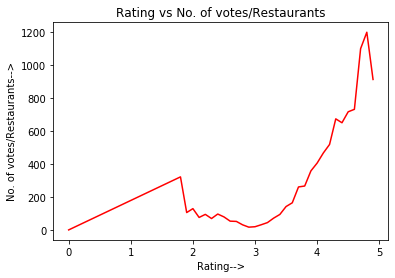

The above graph depicts how the rating is affected by number of votes per restaurant. As it is evident from the
graph, the number of votes per restaurant increases with increase in rating. More number of votes per restaurant
received when rating lies between 4 to 5.
      


In [27]:
#2.1.1 Number of Votes given Restaurant
df_votes_rating=df[['Votes','Aggregate rating']]
votes_rating=df_votes_rating.values
dict_rating_votes={}
rating_lst=[]
for i in range(len(votes_rating)):
    rating=votes_rating[i][1]
    votes=votes_rating[i][0]
    rating_lst.append(rating)
    dict_rating_votes[rating]=dict_rating_votes.get(rating,0)+votes
rating=np.array(list(dict_rating_votes.keys()))
votes=np.array(list(dict_rating_votes.values()))
restaurants=np.unique(rating_lst,return_counts=True)[1]
indices=rating.argsort()
rating=rating[indices]
votes=votes[indices]
vote_restaurant_ratio=votes/restaurants
plt.plot(rating,vote_restaurant_ratio,'r')
plt.xlabel('Rating-->')
plt.ylabel('No. of votes/Restaurants-->')
plt.title('Rating vs No. of votes/Restaurants')
print('2.1.1')
plt.show()
print("""The above graph depicts how the rating is affected by number of votes per restaurant. As it is evident from the
graph, the number of votes per restaurant increases with increase in rating. More number of votes per restaurant
received when rating lies between 4 to 5.
      """)

2.1.2


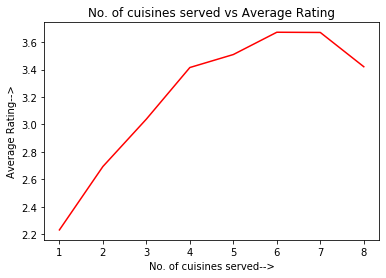

The above graph depicts how the average rating is affected by number of cuisines served in a restaurant. 
As it is evident from the graph, the average rating increases with increase in number of cuisines served. The highest 
average rating is achieved when number of cuisines served in a restaurant lies between 4 to 7.
      

The below data shows how many restaurants are serving how many cuisines:

3394  restaurants is serving  1  cuisines
3444  restaurants is serving  2  cuisines
1840  restaurants is serving  3  cuisines
584  restaurants is serving  4  cuisines
164  restaurants is serving  5  cuisines
74  restaurants is serving  6  cuisines
28  restaurants is serving  7  cuisines
14  restaurants is serving  8  cuisines


In [28]:
#2.1.2 Restaurant serving more number of cuisines
df.dropna(inplace=True)
cuisines_rating=df[['Cuisines','Aggregate rating']].values
dict_cuisines_ratings={}
lst_cuisines_served=[]
for i in cuisines_rating:
    total_cuisines_served=len(i[0].split(','))
    lst_cuisines_served.append(total_cuisines_served)
    rating=i[1]
    if not total_cuisines_served in dict_cuisines_ratings:
                dict_cuisines_ratings[total_cuisines_served]=[]
    dict_cuisines_ratings[total_cuisines_served].append(rating)
dict_cuisines_avg_rating={}
for i in dict_cuisines_ratings:
    dict_cuisines_avg_rating[i]=sum(dict_cuisines_ratings[i])/len(dict_cuisines_ratings[i])    
no_of_cuisines_served=np.array(list(dict_cuisines_avg_rating.keys()))
rating=np.array(list(dict_cuisines_avg_rating.values()))
indices=no_of_cuisines_served.argsort()
no_of_cuisines_served=no_of_cuisines_served[indices]
rating=rating[indices]
plt.plot(no_of_cuisines_served,rating,'r')    
plt.xlabel('No. of cuisines served-->')
plt.ylabel('Average Rating-->')
plt.title('No. of cuisines served vs Average Rating')
print('2.1.2')
plt.show()
no_of_cuisines_served,restaurants=np.unique(lst_cuisines_served,return_counts=True)
print("""The above graph depicts how the average rating is affected by number of cuisines served in a restaurant. 
As it is evident from the graph, the average rating increases with increase in number of cuisines served. The highest 
average rating is achieved when number of cuisines served in a restaurant lies between 4 to 7.
      """)
print()
print("The below data shows how many restaurants are serving how many cuisines:")
print()
for i in range(len(restaurants)):
    print(restaurants[i]," restaurants is serving ",no_of_cuisines_served[i]," cuisines")

2.1.3


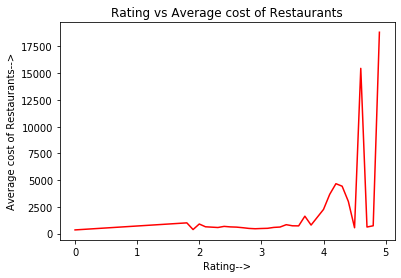

The above graph depicts how the rating is affected by average cost. As it is evident from the 
graph, when the rating is close to 5 the  average cost lies above 2 lakhs. Also, when the average is cost close to 6000,
then the rating lies between 4 and 4.5. This is obvious because to have high quality of food(higher rating), 
the average cost will be high.
      


In [5]:
#2.1.3 Average Cost of Restaurant
cost_rating=df[['Average Cost for two','Aggregate rating']].values
dict_rating_cost={}
for i in cost_rating:
    rating=i[1]
    avg_cost=i[0]
    if not rating in dict_rating_cost:
                dict_rating_cost[rating]=[]
    dict_rating_cost[rating].append(avg_cost)
dict_rating_avg_cost={}
for i in dict_rating_cost:
    dict_rating_avg_cost[i]=sum(dict_rating_cost[i])/len(dict_rating_cost[i])    
rating=np.array(list(dict_rating_avg_cost.keys()))
avg_cost=np.array(list(dict_rating_avg_cost.values()))
indices=rating.argsort()
rating=rating[indices]
avg_cost=avg_cost[indices]
plt.plot(rating,avg_cost,'r')
plt.xlabel('Rating-->')
plt.ylabel('Average cost of Restaurants-->')
plt.title('Rating vs Average cost of Restaurants')
print('2.1.3')
plt.show()
print("""The above graph depicts how the rating is affected by average cost. As it is evident from the 
graph, when the rating is close to 5 the  average cost lies above 2 lakhs. Also, when the average is cost close to 6000,
then the rating lies between 4 and 4.5. This is obvious because to have high quality of food(higher rating), 
the average cost will be high.
      """)

2.1.4


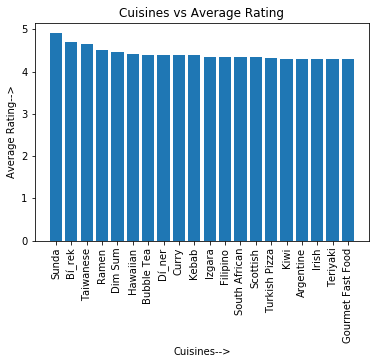

The above bar graph depicts how the average rating is affected by different cuisine types. We can see from graph 
that 'Sundra' cuisine has maximum average rating among all the cuisines.



In [6]:
#2.1.4 Restaurant serving some specific cuisines.
df.dropna(inplace=True)
cuisines_rating=df[['Cuisines','Aggregate rating']].values
dict_cuisines_ratings={}
for i in cuisines_rating:
    cuisines=i[0].split(',')
    rating=i[1]
    for cuisine in cuisines:
        cuisine=cuisine.strip()
        if not cuisine in dict_cuisines_ratings:
                    dict_cuisines_ratings[cuisine]=[]
        dict_cuisines_ratings[cuisine].append(rating)
dict_cuisines_avg_rating={}
for i in dict_cuisines_ratings:
    dict_cuisines_avg_rating[i]=sum(dict_cuisines_ratings[i])/len(dict_cuisines_ratings[i])    
cuisines=np.array(list(dict_cuisines_avg_rating.keys()))
rating=np.array(list(dict_cuisines_avg_rating.values()))
indices=rating.argsort()[::-1][:20]
cuisines=cuisines[indices]
rating=rating[indices]
plt.bar(cuisines,rating)
plt.xticks(rotation=90)
plt.xlabel('Cuisines-->')
plt.ylabel('Average Rating-->')
plt.title('Cuisines vs Average Rating')
print('2.1.4')
plt.show()
print("""The above bar graph depicts how the average rating is affected by different cuisine types. We can see from graph 
that 'Sundra' cuisine has maximum average rating among all the cuisines.
""")

# 2.2 Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

In [29]:
vrl=df[['Votes','Aggregate rating','Locality']].values
dict_lrv={}
for i in vrl:
    rating=i[1]
    votes=i[0]
    locality=i[2]
    if not locality in dict_lrv:
        dict_lrv[locality]=[[],[]]
    dict_lrv[locality][0].append(rating)
    dict_lrv[locality][1].append(votes)
dict_weighted_rating={}
for locality in dict_lrv:
    rating=np.array(dict_lrv[locality][0])
    votes=np.array(dict_lrv[locality][1])
    if sum(votes)>0:
        weighted_rating=np.sum(rating*votes)/sum(votes)
        dict_weighted_rating[locality]=weighted_rating   
locality=np.array(list(dict_weighted_rating.keys()))
rating=np.array(list(dict_weighted_rating.values()))
indices=rating.argsort()[::-1]
locality=locality[indices]
rating=rating[indices]        

In [32]:
print('2.2.1')
print('The following data is of various location and their weighted restaurant rating:')
print()
for i in range(len(rating)):
    print(locality[i],':',rating[i])

2.2.1
The following data is of various location and their weighted restaurant rating:

Marshalltown : 4.9
Kenwood : 4.9
Old Dutch Hospital, Fort : 4.9
Beak Street, Soho : 4.9
Fort Street : 4.9
Pondok Aren : 4.9
Taman Impian Jaya Ancol, Ancol : 4.9
Penjaringan : 4.9
Cengkareng : 4.9
Sofitel Philippine Plaza Manila, Pasay City : 4.9
West Park : 4.9
The Milk District : 4.9
Windermere : 4.9
Paia : 4.9
New Tampa : 4.9
Lexington Street, Soho : 4.9
Venetian Village, Al Maqtaa : 4.9
Deira City Centre Area : 4.9
DIFC : 4.9
Barwa Towers, Al Sadd : 4.9
Nassima Royal Hotel, Trade Centre Area : 4.9
Bebek : 4.9
Gíçvea : 4.9
Caddebostan : 4.9
Setor De Clubes Esportivos Sul : 4.9
Hotel Clarks Amer, Malviya Nagar : 4.9
Aminabad : 4.9
City and Suburban : 4.9
Bishopsgate, City Of London : 4.9
Friends Colony : 4.886916367367881
Powai : 4.841868613138686
Kirlampudi Layout : 4.820161290322581
Hotel Unique, Jardim Paulista : 4.8
Dubai Media City : 4.8
Muwailih Commercial : 4.8
Galeria River, Copacabana : 4.8

Ansal Plaza Mall, Khel Gaon Marg : 3.9383999999999997
Park Plaza Hotel, Sector 55, Noida : 3.937543859649123
íguas Claras : 3.9361702127659575
Hauz Khas Village : 3.9354741657200742
Faerie Glen : 3.9352941176470586
Jama Masjid : 3.933427647534357
Sector 35 : 3.931300236406619
DLF South Point Mall, Golf Course Road : 3.9234589041095904
Janpath : 3.9222246551346616
Eros Hotel, Nehru Place : 3.9201704545454543
DLF Mall of India, Sector 18,  Noida : 3.918569530022955
The Taj Palace Hotel, Chanakyapuri : 3.9142857142857146
Gurdev Nagar : 3.9134408602150534
MGF Mega City Mall, MG Road : 3.913295842538662
Lodhi Colony : 3.911746617466174
Westend Mall, Rajguru Nagar : 3.9000000000000004
Malsi : 3.9
Rave 3, Tilak Nagar : 3.9
Pacific Mall, Jakhan : 3.9
The Landmark Hotel, Mall Road : 3.9
Paltan Bazaar : 3.9
Parade : 3.9
Majiwada, Thane West : 3.9
Central Arcade, DLF Phase 2, Gurgaon : 3.9
Rajguru Nagar : 3.9
Majaz Waterfront, Al Majaz 3 : 3.9
Telok Ayer Street, Outram : 3.9
Al Barari : 3.9
Foun

The Uppal, Aerocity : 3.1513513513513516
Sadar Bazar : 3.148387096774193
JMD Regent Arcade Mall, MG Road : 3.1478260869565213
DLF South Square, Sarojini Nagar : 3.141512915129151
Old Railway Road : 3.139464882943144
Chander Nagar : 3.1225
Mandi House : 3.118333333333333
Aggarwal City Plaza, Rohini : 3.118013468013468
Qutab Plaza, DLF Phase 1 : 3.1174311926605505
Sheikh Sarai : 3.1
Sector 6 : 3.1
Pride Plaza Hotel, Aerocity : 3.1
Small Heath : 3.1
Neil Road, Outram : 3.1
ibis New Delhi, Aerocity : 3.1
Cochrane : 3.1
Chinatown, Outram : 3.1
Jor Bagh : 3.1
Sector 15, Dwarka : 3.1
ARSS Mall, Paschim Vihar : 3.1
Sector 39 : 3.0989690721649485
Aerocity : 3.095081967213115
Wazirpur : 3.0930232558139537
Sector 17 : 3.0923599320882853
Sector 61 : 3.092307692307692
Sector 11 : 3.092202729044834
Logix City Centre, Sector 32, Noida : 3.0903114186851206
Krishna Nagar : 3.088365650969529
Parsavnath City Mall, Sector 12, Faridabad : 3.0814814814814815
Centre Stage Mall, Sector 18 : 3.0728949478748997

In [31]:
print('Top 10 locations with more weighted restaurant rating:')
print()
for i in range(len(rating[:10])):
    print(locality[i])

Top 10 locations with more weighted restaurant rating:

Marshalltown
Kenwood
Old Dutch Hospital, Fort
Beak Street, Soho
Fort Street
Pondok Aren
Taman Impian Jaya Ancol, Ancol
Penjaringan
Cengkareng
Sofitel Philippine Plaza Manila, Pasay City
